In [ ]:
# import libraries
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# import cifar10 dataset from keras dataset
from tensorflow.keras.datasets import cifar10
# upload cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# set the random seed
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

In [ ]:
# normalize the vector images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# check after one-hot encoding
y_train.shape

(50000, 10)

In [ ]:
# for plot learning curves
def plot_learning_curve(history, title):
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

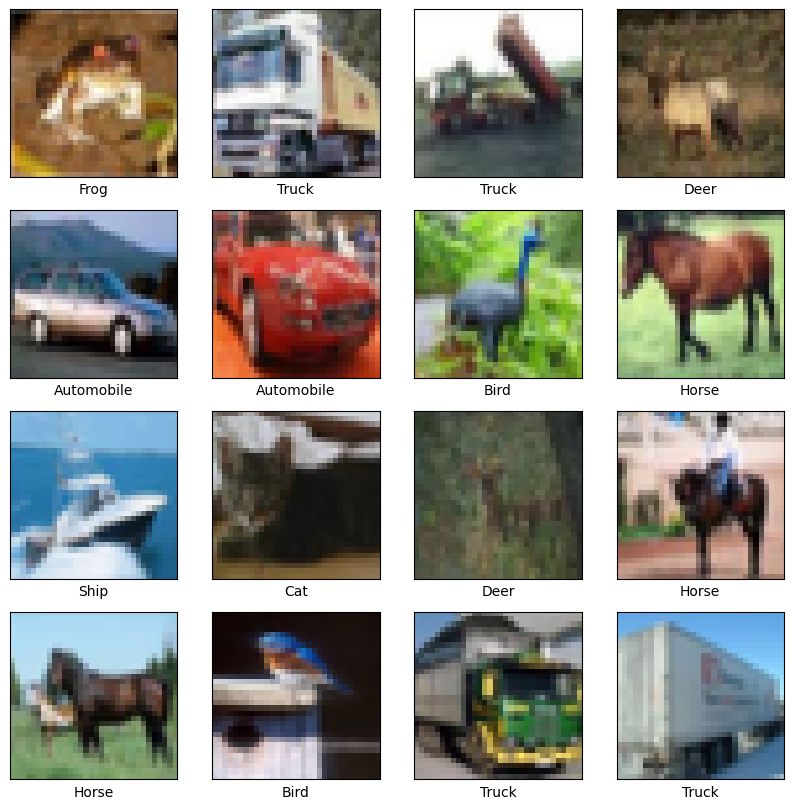

In [ ]:
# assign class names
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
# plot image
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

There are images with 10 classes for classification.

In [ ]:
# MLP neural network with one hidden layer
model = tf.keras.models.Sequential([

    # converts a 2D image into a 1D vector
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),

    # Hidden layer with ReLU
    tf.keras.layers.Dense(100, activation=tf.nn.relu),

    # Hidden layer with ReLU
    tf.keras.layers.Dense(100, activation=tf.nn.relu),

    # Output layer with 10 neurons
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# define learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # reduce LR when validation loss stops improving
    factor=0.5,          # reduce LR by half
    patience=3,          # wait 3 epochs before reducing
    min_lr=1e-6,
    verbose=1
)

In [ ]:
# train model
history = model.fit(
    x_train, y_train,
    epochs=30,              # train longer for better convergence
    validation_split=0.2,   # use 20% of training data as validation
    callbacks=[lr_scheduler]
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2671 - loss: 2.0043 - val_accuracy: 0.3578 - val_loss: 1.7676 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3679 - loss: 1.7445 - val_accuracy: 0.3929 - val_loss: 1.6847 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4014 - loss: 1.6618 - val_accuracy: 0.3994 - val_loss: 1.6819 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4158 - loss: 1.6238 - val_accuracy: 0.4131 - val_loss: 1.6465 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4267 - loss: 1.5913 - val_accuracy: 0.4231 - val_loss: 1.6138 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4388 - loss: 1.5615 - val_accuracy: 0.4357 - val_loss: 1.5912 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4

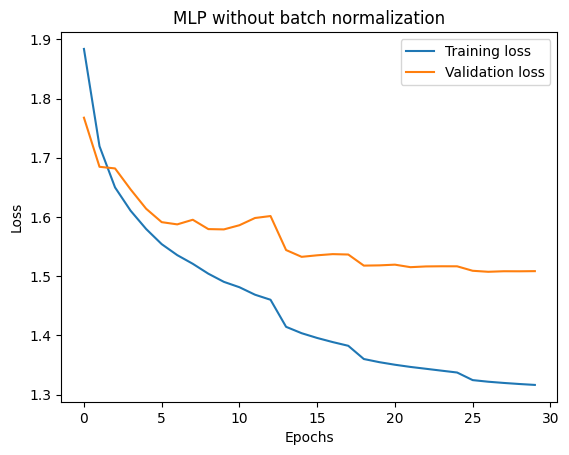

In [ ]:
plot_learning_curve(history, "MLP without batch normalization")

Trainning loss decreased theit loss to 1.3 than Validation loss that has 1.5

In [ ]:
def plot_learning_curve_accuracy(history, title):
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

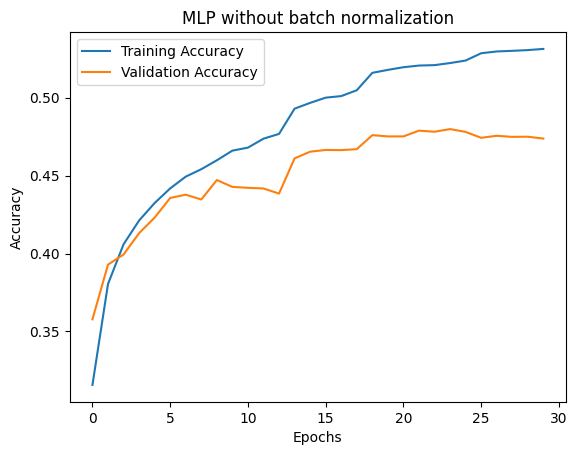

In [ ]:
plot_learning_curve_accuracy(history, "MLP without batch normalization")

Training and validation accuracies showed acceptable results.

However, that is not fully enough.

**Add a Batch Normalization**

is a technique used in deep learning to standardize the inputs of each layer, ensuring stable training by reducing internal covariate shifts and accelerating convergence.

In [ ]:
# MLP neural  network with one hidden layer and batch normalization
model_batch = tf.keras.models.Sequential([

    # converts a 2D image into a 1D vector
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),

    # Hidden layer with ReLU
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),  # batch norm.

    # Hidden layer with ReLU
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),  # batch norm.


    # Output layer with 10 neurons
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model_batch.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# train model
history_batch = model_batch.fit(
    x_train, y_train,
    epochs=30,              # train longer for better convergence
    validation_split=0.2,   # use 20% of training data as validation
    callbacks=[lr_scheduler]
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3380 - loss: 1.8873 - val_accuracy: 0.3524 - val_loss: 1.9303 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4291 - loss: 1.6115 - val_accuracy: 0.4024 - val_loss: 1.7147 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4504 - loss: 1.5467 - val_accuracy: 0.4045 - val_loss: 1.6993 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4695 - loss: 1.5001 - val_accuracy: 0.3805 - val_loss: 1.8420 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4801 - loss: 1.4557 - val_accuracy: 0.4238 - val_loss: 1.6830 - learning_rate: 0.0010
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4955 - loss: 1.4223 - val_accuracy: 0.4192 - val_loss: 1.6817 - learning_rate: 0.0010
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 

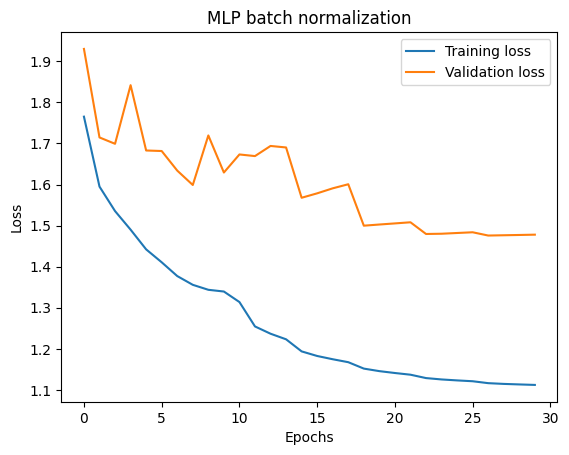

In [ ]:
plot_learning_curve(history_batch, "MLP batch normalization")

Trainning loss decreased theit loss to 1.1 than Validation loss that has 1.5

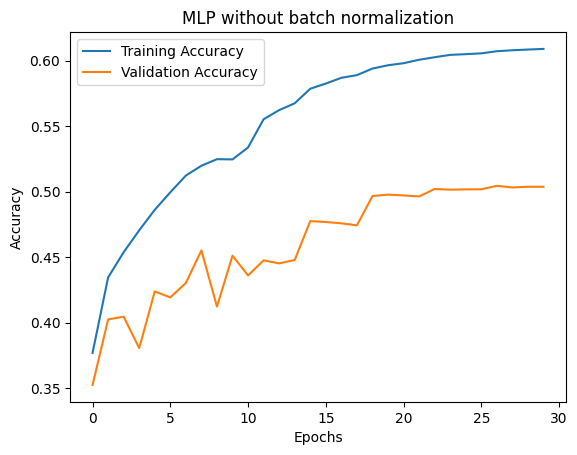

In [ ]:
plot_learning_curve_accuracy(history_batch, "MLP without batch normalization")

Adding **batch normalization** clearly improved training speed, stability, and validation performance. It helped the model reach higher accuracy and lower loss compared to the version without it.

Training accuracy without **Batch Normalization** was lower, ending around 53%.

Training accuracy with **Batch Normalization** improved steadily, reaching about 60% by the last epoch.

The accuracy was increased to 7%.

**Try different activation functions**

Leaky ReLu (activation function)

In [ ]:
# MLP neural network with hidden layers and leaky relu
model_2 = tf.keras.models.Sequential([

    # converts a 2D image into a 1D vector
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),

    # Hidden layer with ReLU
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(alpha=0.3), # leakyReLu

    # Hidden layer with ReLU
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(alpha=0.3), # leakyReLu

    # Output layer with 10 neurons
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# train model
history_2 = model_batch.fit(
    x_train, y_train,
    epochs=30,              # train longer for better convergence
    validation_split=0.2,   # use 20% of training data as validation
    callbacks=[lr_scheduler]
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6035 - loss: 1.1313 - val_accuracy: 0.5026 - val_loss: 1.4770 - learning_rate: 1.5625e-05
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6039 - loss: 1.1296 - val_accuracy: 0.5027 - val_loss: 1.4774 - learning_rate: 1.5625e-05
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6040 - loss: 1.1287 - val_accuracy: 0.5028 - val_loss: 1.4778 - learning_rate: 1.5625e-05
Epoch 4/30
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6042 - loss: 1.1280
Epoch 4: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6043 - loss: 1.1279 - val_accuracy: 0.5029 - val_loss: 1.4781 - learning_rate: 1.5625e-05
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6048 - loss: 1.1272 - val_accuracy: 0.5027 - val_loss: 1.4784 - learning_rate: 7.8125e-06
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/s

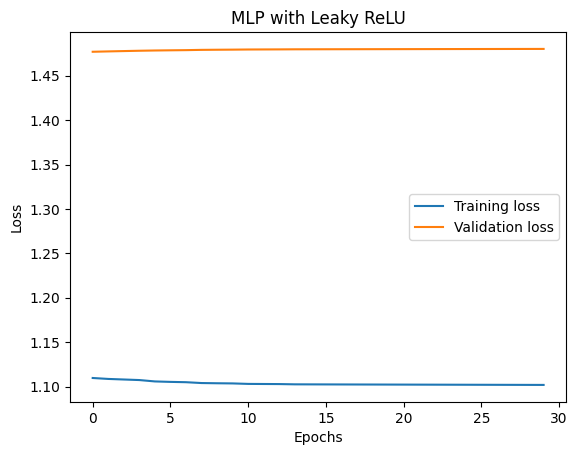

In [ ]:
plot_learning_curve(history_2, "MLP with Leaky ReLU")

Trainning loss decreased theit loss to 1.10 than Validation loss that has 1.5

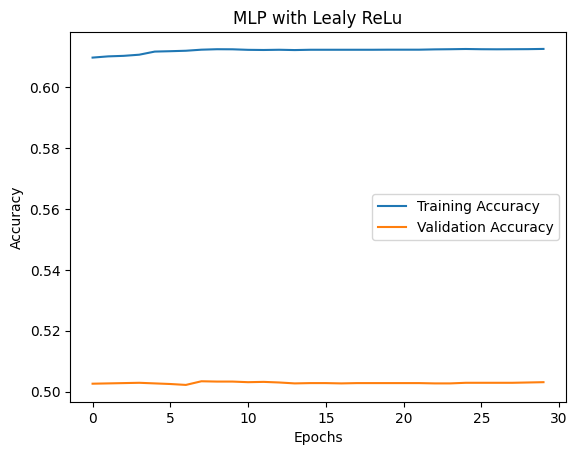

In [ ]:
plot_learning_curve_accuracy(history_2, "MLP with Lealy ReLu")

Training accuracy showed resuls as MLP with Batch Normalization 60%. However, for validation accuracy it is liitle bit less for 10%.

**Campare Accuracy**

In [ ]:
# MLP model without Batch Normalization
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")

Final training accuracy: 0.5314
Final validation accuracy: 0.4738


In [ ]:
# MLP model with Batch Normalization
final_train_acc_batch = history_batch.history['accuracy'][-1]
final_val_acc_batch = history_batch.history['val_accuracy'][-1]

print(f"Final training accuracy: {final_train_acc_batch:.4f}")
print(f"Final validation accuracy: {final_val_acc_batch:.4f}")

Final training accuracy: 0.6090
Final validation accuracy: 0.5037


In [ ]:
# MLP model with Leaky ReLu
final_train_acc_2 = history_2.history['accuracy'][-1]
final_val_acc_2 = history_2.history['val_accuracy'][-1]

print(f"Final training accuracy: {final_train_acc_2:.4f}")
print(f"Final validation accuracy: {final_val_acc_2:.4f}")

Final training accuracy: 0.6126
Final validation accuracy: 0.5031


**Campare Loss**

In [ ]:
# MLP model without Batch Normalization
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final training loss: {final_train_loss:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Final training loss: 1.3163
Final validation loss: 1.5085


In [ ]:
# MLP model with Batch Normalization
final_train_loss_batch = history_batch.history['loss'][-1]
final_val_loss_batch = history_batch.history['val_loss'][-1]

print(f"Final training loss: {final_train_loss_batch:.4f}")
print(f"Final validation loss: {final_val_loss_batch:.4f}")

Final training loss: 1.1122
Final validation loss: 1.4780


In [ ]:
# MLP model with Leaky ReLu
final_train_loss_2 = history_2.history['loss'][-1]
final_val_loss_2 = history_2.history['val_loss'][-1]

print(f"Final training loss: {final_train_loss_2:.4f}")
print(f"Final validation loss: {final_val_loss_2:.4f}")

Final training loss: 1.1018
Final validation loss: 1.4802


**Conclusion**



In this lab 5, an MLP model was used to classify the CIFAR-10 dataset. Adding Batch Normalization improved the model's accuracy and reduced the loss compared to the basic MLP. Using Leaky ReLU slightly improved training performance, but validation accuracy stayed similar. Overall, Batch Normalization gave the best improvement, but MLP models still have limited accuracy on image data compared to CNNs.

**Prediction Function**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


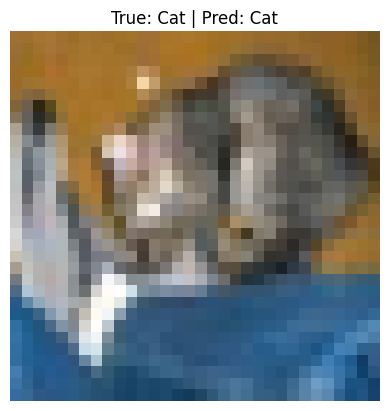

In [ ]:
def plot_predictions(index):
    img = x_test[index]
    true_label = class_names[np.argmax(y_test[index])]
    pred_probs = model_batch.predict(np.expand_dims(img, axis=0))
    pred_label = class_names[np.argmax(pred_probs)]

    plt.imshow(img)
    plt.title(f"True: {true_label} | Pred: {pred_label}")
    plt.axis('off')
    plt.show()


for i in range(1):
    plot_predictions(i)

For the prediction model MLP with Batch Norm. is the best.